<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabildiad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aletorios
- Se calculan valores de variable aletoria $x$ a partir de probabilidades específicas


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.

## Función de Distribución Acumulativa (CDF):

La CDF es una función que proporciona la probabilidad acumulativa de que una variable aleatoria sea menor o igual a un valor específico. Se denota como:
$$
F(x) = \int_{-∞}^{x}f(x)dx
$$

donde $f(x)$ es la PDF.

## Valor Esperado (Media)

El valor esperado de una variable aleatoria continua se calcula como el promedio ponderado de todos los valores posibles, donde el peso es dado por la PDF. Matemáticamente, se expresa como
$$
\mu_{x} = VE(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx
$$

## Varianza y Desviación Estándar:

La varianza y la desviación estándar miden la dispersión de una variable aleatoria continua. La varianza se calcula como:

$$
varianza = \sigma^2=V(x)=\int_{-\infty}^{\infty}(x - \mu)^2\cdot f(x) dx
$$
, donde $\mu$ es la media, y la desviación estándar es la raíz cuadrada de la varianza

$$
\sigma = \sqrt{\sigma^2}
$$

## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [78]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

In [79]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [96]:
x = 18
media = 20
desv_std = 20
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0198
La densidad de x =  18  es  0.0198


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

In [97]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[75.6966 76.1009 82.4091 85.9318 85.9414 78.1133 88.1841 92.0268 78.4264
 85.4092 81.7195 73.6346 81.5669 74.7416 85.9759 77.7881 74.792  77.0292
 78.5202 82.1097 72.0629 75.1464 81.502  88.5013 81.0588 78.4602 81.8231
 83.5832 82.808  85.254  78.757  81.1726 76.9461 79.4335 79.3269 73.8059
 78.312  87.4033 80.4643 82.9874 88.6921 86.1846 79.9171 78.1021 76.9871
 76.0573 73.2152 80.5499 75.7458 80.9423 82.69   84.1351 78.1461 76.9101
 80.0286 84.9945 80.1999 84.3663 78.3093 85.1717 74.7344 80.8322 83.6918
 78.0052 82.1368 90.0253 86.4439 78.1149 76.5128 83.1938 89.7021 73.1566
 76.6793 83.0748 74.668  86.8752 75.097  81.0863 76.4861 75.5175 72.2748
 80.2486 80.0839 79.2608 72.8945 85.1169 81.08   80.634  78.0304 79.1718
 81.0333 72.2137 76.3531 77.9203 81.1783 76.0632 76.4433 79.4963 83.4326
 70.898 ]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [98]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[84.6032 71.1816 83.1954 80.0598 80.5336 83.1302 89.1238 84.0508 88.9975
 89.4495 81.0476 84.776  81.6103 69.5046 74.4846 77.3607 83.4893 77.1413
 86.5575 80.9545 83.1164 73.84   86.057  85.6283 72.3129 74.0217 85.3072
 74.7539 81.207  77.7775 72.2567 76.2625 85.8757 82.5692 75.7401 77.4761
 77.7165 75.1856 86.1607 70.2284 85.8534 77.0696 77.684  74.4327 80.4022
 83.4237 75.5335 76.3078 79.0491 71.9535 81.8545 82.9274 75.2406 84.7234
 80.9401 79.7635 80.141  85.4241 71.4425 79.4657 69.6278 79.3938 76.6485
 83.2996 79.1397 74.2198 89.3973 87.9666 82.1105 80.0571 72.8746 74.8989
 71.4549 82.9013 78.3128 66.0845 79.2962 80.0721 77.4739 83.8381 81.6698
 79.1683 75.1123 81.1325 87.3252 79.2641 79.5497 81.602  80.1487 78.6915
 80.8458 76.7249 78.9121 77.5219 78.1631 79.0993 82.9668 80.8091 74.6308
 80.7435]


## Calcular la densidad de los números aleatorios

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [99]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  79.5153
La desv. std de los números aleatorios es:  4.8738
Las densidades: 
[0.0475 0.019  0.0616 0.0813 0.0801 0.0622 0.0117 0.0531 0.0123 0.0103
 0.0779 0.0457 0.0746 0.0099 0.048  0.0742 0.0587 0.0727 0.0288 0.0784
 0.0623 0.0416 0.0333 0.0373 0.0275 0.0434 0.0404 0.0508 0.0771 0.0768
 0.027  0.0655 0.0349 0.0673 0.0606 0.075  0.0765 0.0552 0.0323 0.0133
 0.0351 0.0722 0.0763 0.0475 0.0805 0.0593 0.0586 0.0659 0.0815 0.0246
 0.0729 0.0641 0.0557 0.0462 0.0784 0.0817 0.0812 0.0393 0.0208 0.0818
 0.0105 0.0818 0.0689 0.0606 0.0816 0.0454 0.0105 0.0182 0.071  0.0813
 0.0324 0.0523 0.0209 0.0643 0.0794 0.0018 0.0818 0.0813 0.075  0.0552
 0.0742 0.0816 0.0544 0.0775 0.0227 0.0817 0.0819 0.0747 0.0812 0.0807
 0.0789 0.0695 0.0812 0.0753 0.0788 0.0816 0.0637 0.079  0.0495 0.0793]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



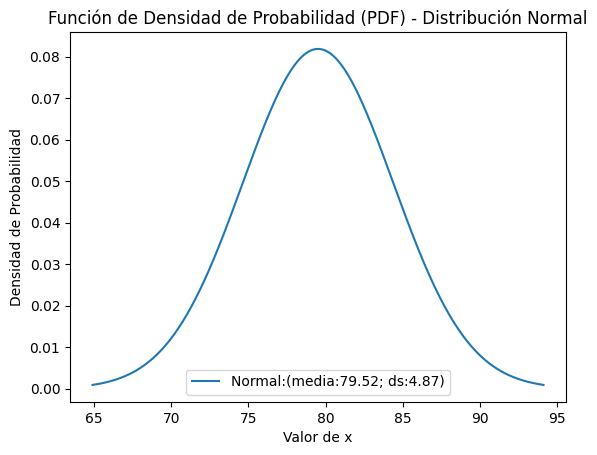

In [100]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrar números entre 80 y 85?

$$
F(80 \le x \le 85)
$$

$$
F(x \le 85) - F(x \le 80)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [101]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.3302 aproximadamnte  33.02


## Visualizar probabildiades

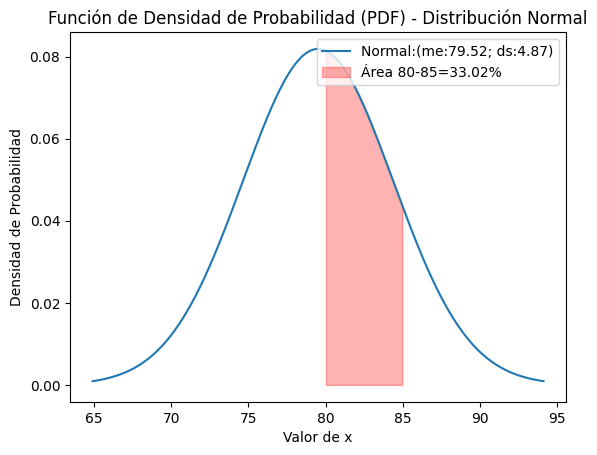

In [102]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión *csv* que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.


### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son $n=507$ registros de los cuales hay $260$ mujeres y $247$ hombres.

La media aritmética de la variable estatura es $171.14$ con desviación estándar de $9.40$; la media de la variable peso es $69.14$ con desviación estándar de $13.34$

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
Mujer     260
Hombre    247
Name: genero_cat, dtype: int64


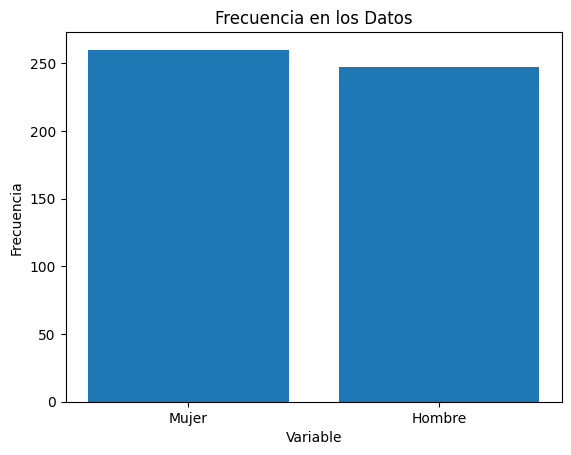

In [103]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)


### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?



In [104]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de hombre con estatura maypr que $180$.

$$
F(x \ge 180)
$$

Restar:

$$
1 - F(x \le 180)
$$

para determinar los que están o son mayores que $180$.


La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.66


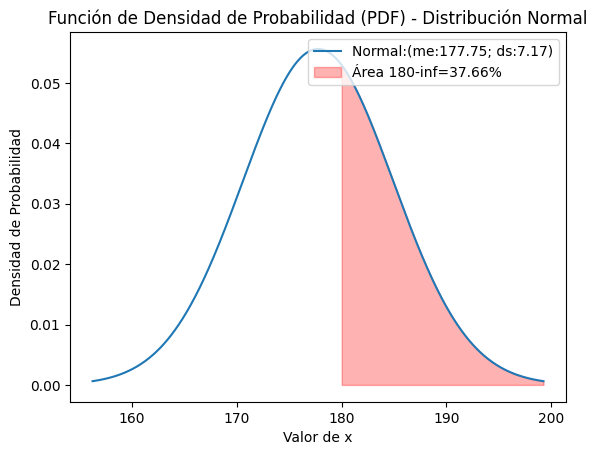

In [105]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2)

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura entre 160 y 180 centímetros?

$$
F(160 \le x \le 180)
$$

Restar:

$$
F(x \le 180) - F(x \le 160)
$$

para determinar los que están en el intervalo $160$ - $180$

La probabilidad entre  160  y  180  es 0.6168 aproximadamente  61.68


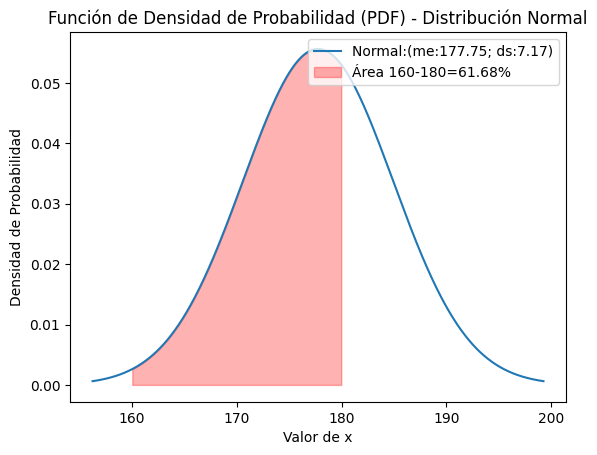

In [106]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2)

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

$$
F(x \le 165)
$$

para determinar los que están en el intervalo por debajo de $165$

La probabilidad entre  -inf  y  165  es 0.0377 aproximadamente  3.77


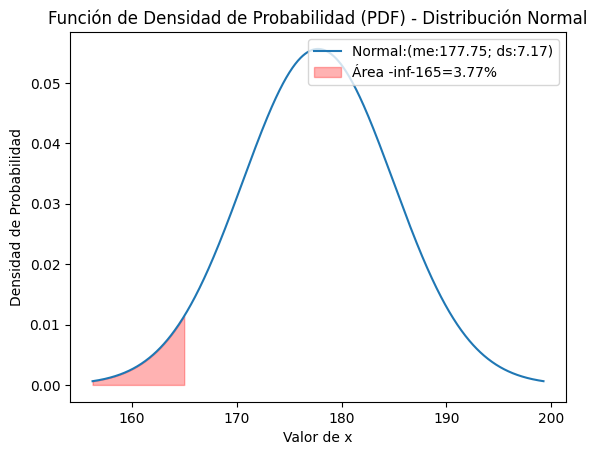

In [107]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2)

### Probabilidade con datos del género mujeres


#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura mayor que 180 centímetros?

In [92]:
# Filtrar datos para obtener solo las mujeres
datos_mujeres = datos.query("genero_cat == 'Mujer'")

# Media estatura de mujeres
media_est_mujeres = np.mean(datos_mujeres['estatura'])
desv_std_est_mujeres = np.std(datos_mujeres['estatura'])
print ("La media de estatura mujeres", np.round(media_est_mujeres, 4))
print ("La desviación estándar de estatura mujeres", np.round(desv_std_est_mujeres, 4))

La media de estatura mujeres 164.8723
La desviación estándar de estatura mujeres 6.532


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de la probabilidad con estatura mayr que $180$ en mujeres:

La probabilidad entre  180  y  inf  es 0.0103 aproximadamente  1.03


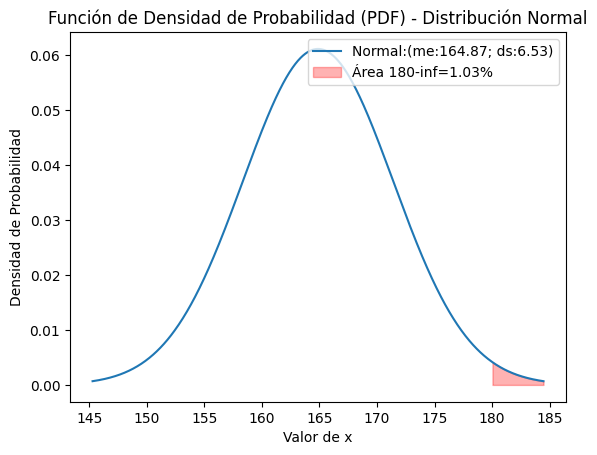

In [108]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2)

#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura entre 160 y 180 centímetros?



La probabilidad entre  160  y  180  es 0.7619 aproximadamente  76.19


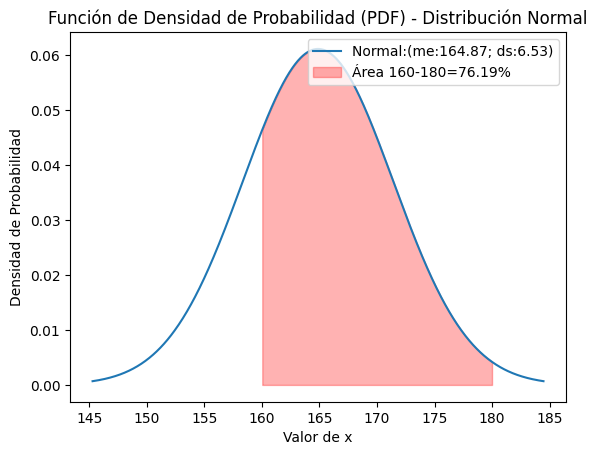

In [109]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres) - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2)

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

La probabilidad entre  -inf  y  165  es 0.5078 aproximadamente  50.78


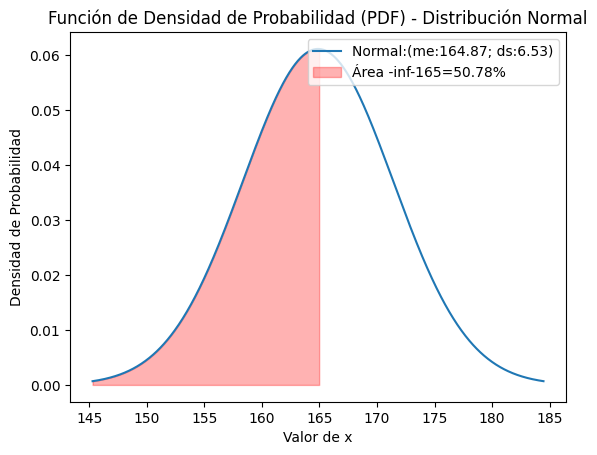

In [110]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2)

# Interpretación del caso

- ¿Qué es más probable: encontrar hombres por que midan por encima del $180$ centímetros de estatura o mujeres por encima del $180$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. **Resp**: Existe una probabilidad del $37$% de encontrar hombres con estatura superior al 180 centímetros en relación al $1.03$% de encontrar mujeres por encima del $180$ centímetros de estatura por lo que es más probable que se dé la primera aseveración.

- ¿Qué es más probable: encontrar hombres por que midan por debajo o igual a $165$ centímetros de estatura o mujeres por debajo o igual a $165$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. Es más probable encontrar mujeres con estatura por debajo del $165$ centímeros con el $50.78$% aproximadamente en relación al $3.77$% de encontrar hombres por debajo de $165$ centímetros aproximadamente.

Las probabilidades se calcularon en relación a los datos cargados.



# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.